# Regression Models Training

## Importing libraries

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold,GridSearchCV,cross_val_score,cross_val_predict,train_test_split
import matplotlib.pyplot as plt

## Reading Data and cross-validation initialization

In [2]:
df=pd.read_csv("cars/preprocessed.csv")
df = df.sample(frac=1).reset_index(drop=True)
print(df.shape)
kfold = KFold(n_splits=10, random_state=7,shuffle=True)

(2676, 133)


## Initializing, Training, and cross-validating Models

Sample Accuracy 0.8745229807685326
Accuracy: 87.30% (1.43%)


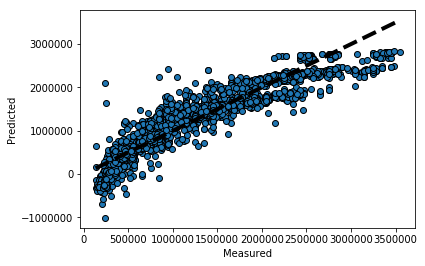

In [4]:
lr=LinearRegression()
x=df.drop(['price'],axis=1)
y=df.price
xTrain,xTest,yTrain,yTest=train_test_split(x,y)
lr.fit(xTrain,yTrain)
print("Sample Accuracy",lr.score(xTest,yTest))
results = cross_val_score(lr, x, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
predict=cross_val_predict(lr,x,y,cv=kfold)
fig,ax=plt.subplots()
ax.scatter(y,predict,edgecolors=(0,0,0))
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Sample Accuracy: 0.9617379776240724
Accuracy: 96.77% (1.03%)


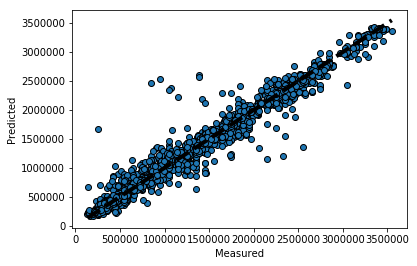

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
x=df.drop(['price','id','Unnamed: 0'],axis=1)
y=df.price
gbr=GradientBoostingRegressor(loss='ls',max_depth=5)
gbr.fit(xTrain,yTrain)
print("Sample Accuracy:",gbr.score(xTest,yTest))
results = cross_val_score(gbr, x, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
predict=cross_val_predict(gbr,x,y,cv=kfold)
fig,ax=plt.subplots()
ax.scatter(y,predict,edgecolors=(0,0,0))
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Sample Accuracy: 0.9527800438388752
Accuracy: 95.59% (0.89%)


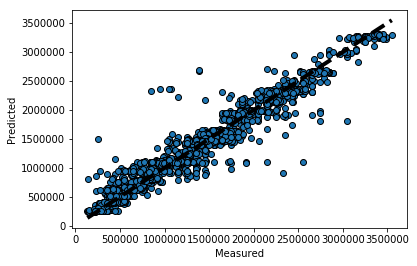

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(max_depth=5,n_estimators=100)
rfr.fit(xTrain,yTrain)
print("Sample Accuracy:",rfr.score(xTest,yTest))
results = cross_val_score(rfr, x, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
predict=cross_val_predict(rfr,x,y,cv=kfold)
fig,ax=plt.subplots()
ax.scatter(y,predict,edgecolors=(0,0,0))
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Saving the trained models

In [26]:
import pickle
filename = 'Models/linear_model.sav'
pickle.dump(lr, open(filename, 'wb'))
filename = 'Models/gradientbooster_model.sav'
pickle.dump(gbr, open(filename, 'wb'))
filename = 'Models/randomforest_model.sav'
pickle.dump(rfr, open(filename, 'wb'))